In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as optimize
import os
import sys
import collections
import itertools
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import sklearn.metrics
from scipy.stats import mode
from scipy.spatial.distance import squareform

In [2]:
inputs = pd.read_csv('../Data/all_inputs_cleaned.csv')
outputs = pd.read_csv('../Data/all_outputs_cleaned.csv')

In [3]:
inputs.iloc[:,2:]

,CPI,InterestRate,GDP,ValAddConst,ValAddInfo,Borrowing,CommercialLoan,ConsumerLoan,Deficit,ITBPrice,ITBVol,VGTPrice,VGTVol,S&P500Price,S&P500Vol
0,0.005007,0.031315,0.012731,0.016023,0.000000,-0.004089,0.178,0.054,-2.393523,-0.141342,0.058676,-0.058480,-0.357298,-0.015674,0.010319
1,0.002989,0.010122,0.012731,0.016023,0.000000,0.016496,0.201,0.078,-1.361045,-0.087839,2.328675,-0.036031,0.028369,0.002547,-0.155359
2,0.002484,0.050100,0.010429,0.000000,0.014294,0.007533,0.223,0.045,-1.478174,-0.021042,0.796079,0.032067,-0.368216,0.013990,0.089268
3,0.005451,0.001908,0.010429,0.000000,0.014294,-0.008966,0.177,0.056,-2.616416,0.046412,2.381466,0.066667,0.267074,0.022189,-0.029398
4,0.004436,0.000000,0.010429,0.000000,0.014294,-0.005700,0.222,0.074,0.951423,0.046867,-0.436061,0.044646,0.280520,0.028076,0.159019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0.000530,0.038710,0.012081,0.012858,0.015515,0.166242,0.013,0.073,0.440654,0.052962,0.067876,0.038191,-0.165449,0.009060,0.254976
200,0.003678,0.047619,0.011676,0.015295,0.011737,0.062205,-0.029,0.058,-1.465993,0.066633,-0.030136,0.092126,0.350401,0.034360,-0.010638
201,0.001241,0.003953,0.011676,0.015295,0.011737,0.001615,-0.026,0.060,-2.364214,0.079389,0.066784,0.040382,-0.028132,0.047030,-0.146846
202,0.001803,0.007874,0.011676,0.015295,0.011737,-0.016332,-0.021,0.030,-0.052340,-0.008281,0.420013,-0.034826,-0.024273,0.005205,0.156903


In [4]:
outputs.iloc[:,4]

0      0.000744
1      0.001250
2      0.001117
3      0.000567
4      0.000331
         ...   
199    0.001916
200    0.000645
201    0.001087
202    0.001325
203    0.001966
Name: Total_Private, Length: 204, dtype: float64

# Linear Regression

In [5]:
X = inputs.iloc[:,2:] # using all features, except the fact that it is a time series (ignoring column 1 - Month)
y = outputs.iloc[:,4] # toggle between 2,3,4 to predict Construction, Information and Total Private
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
model.score(X_test, y_test)

0.20705216039330365

In [6]:
np.max(pred - y_test)

0.007677130471038512

In [7]:
np.linalg.norm(pred - y_test)

0.016689692139943042

In [8]:
sklearn.metrics.mean_squared_error(y_test, pred)

4.492674576227042e-06

In [9]:
sklearn.metrics.r2_score(y_test, pred)

0.20705216039330365

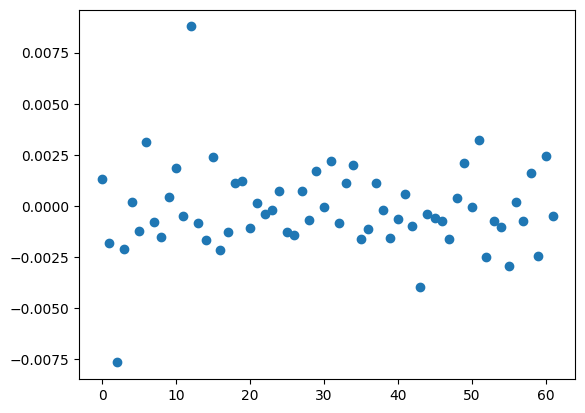

In [10]:
plt.scatter(range(np.size(y_test)), y_test - pred)

In [11]:
pred_sign = np.sign(pred)
y_test_sign = np.sign(y_test)

In [12]:
classification_accuracy = 1 - 0.5*np.sum(np.abs(pred_sign - y_test_sign))/np.size(y_test_sign)
classification_accuracy # test accuracy for classification via linear regression

0.8225806451612903

In [13]:
pred_train = model.predict(X_train)
pred_train_sign = np.sign(pred_train)
y_train_sign = np.sign(y_train)
train_accuracy = 1 - 0.5*np.sum(np.abs(pred_train_sign - y_train_sign))/np.size(y_train_sign)
train_accuracy # train accuracy for classification via linear regression

0.8802816901408451

# Logistic Regression

In [14]:
X = inputs.iloc[:,2:] # using all features, except the fact that it is a time series (ignoring column 1 - Month)
y = outputs.iloc[:,4] # toggle between 2,3,4 to predict Construction, Information and Total Private
y = np.sign(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test) # test accuracy (boolean labels)

0.8709677419354839

# Logistic Regression (with multiple classes)

In [15]:
X = inputs.iloc[:,2:] # using all features, except the fact that it is a time series (ignoring column 1 - Month)
y = outputs.iloc[:,4] # toggle between 2,3,4 to predict Construction, Information and Total Private
n = 10 # number of classes
y = pd.cut(y,n,labels=range(n)) # create n classes for the labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test) # test accuracy (multiclass labels)

0.3870967741935484

# Decision Tree Classifier

In [16]:
X = inputs.iloc[:,2:] # using all features, except the fact that it is a time series (ignoring column 1 - Month)
y = outputs.iloc[:,4] # toggle between 2,3,4 to predict Construction, Information and Total Private
y = np.sign(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test) # test accuracy (boolean labels)

0.9032258064516129

# SVM Classifier

In [17]:
X = inputs.iloc[:,2:] # using all features, except the fact that it is a time series (ignoring column 1 - Month)
y = outputs.iloc[:,4] # toggle between 2,3,4 to predict Construction, Information and Total Private
y = np.sign(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = SVC()
model.fit(X_train, y_train)
model.score(X_test, y_test) # test accuracy (boolean labels)

0.8709677419354839

# KNN (with dynamic time warping)

In [18]:
from fastdtw import fastdtw
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def calculate_dtw(series1, series2):
    distance_dtw, _ = fastdtw(series1, series2)
    return distance_dtw

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

knn_model = KNeighborsClassifier(n_neighbors=4, metric=calculate_dtw)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8870967741935484


# Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

y_labels = (y > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.3, random_state=0)
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9032258064516129
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.94      0.94      0.94        54

    accuracy                           0.90        62
   macro avg       0.78      0.78      0.78        62
weighted avg       0.90      0.90      0.90        62


# Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

y_sign = np.sign(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_sign, test_size=0.3, random_state=3)
rf_model = RandomForestClassifier(n_estimators=100, random_state=3)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.967741935483871
Classification Report:
              precision    recall  f1-score   support

        -1.0       1.00      0.78      0.88         9
         1.0       0.96      1.00      0.98        53

    accuracy                           0.97        62
   macro avg       0.98      0.89      0.93        62
weighted avg       0.97      0.97      0.97        62


# Baseline

In [21]:
X = inputs.iloc[:,2:] # using all features, except the fact that it is a time series (ignoring column 1 - Month)
y = outputs.iloc[:,4] # toggle between 2,3,4 to predict Construction, Information and Total Private

y_labels = (y > 0).astype(int)

# predict next month's class to be the same as this month's class
y_pred = y_labels.shift(1).dropna()

# split the data into training and testing sets along with corresp. indices
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y_labels, np.arange(len(y_labels)), test_size=0.3, random_state=3)

# check accuracy of baseline
accuracy = np.sum(y_pred[indices_test] == y_test)/np.size(y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.967741935483871
